Побудова ансамблiв моделей
класифiкацiї та регресiї засобами бiблiотеки
Scikit-Learn Python


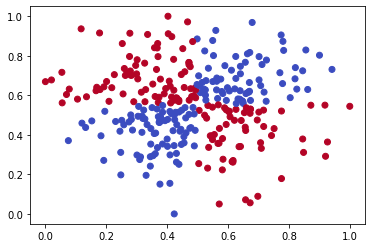

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, roc_curve, plot_roc_curve, auc, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
warnings.simplefilter("ignore")

np.random.seed(0)
X=np.random.randn(300,2)
Y=np.logical_xor(X[:,0]>0, X[:,1]>0)
min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm)

# 2 Побудувати моделi нейронних мереж,
використовуючи класи MLPClassifier або MLPRegressor, для класифiкацiї або регресiї згi-
дно з варiантом.


In [2]:
#building NN

model = MLPClassifier()

model.fit(Xtrain, Ytrain)
print("Score of default model: ", model.score(Xtest, Ytest))
print("Loss on starting iters: ", model.loss_curve_[:2])
print("Loss on ending iters: ", model.loss_curve_[-2:])
#loss нельзя вызвать до фита, а если задавать параметром в классификаторе - то он показывает все 200 итераций

Score of default model:  0.7466666666666667
Loss on starting iters:  [0.7128198205131552, 0.7087602475423065]
Loss on ending iters:  [0.6064617374787376, 0.6059444729528624]


Дослiдити вплив рiзних параметрiв MLPClassifier або MLPRegressor, згi-
дно з варiантом, на результат класифiкацiї/ регресiї:
• дослiдити вплив рiзних методiв визначення learning_rate на ре-
зультат класифiкацiї (для solver=’sgd’),
• використати warm_start=True.

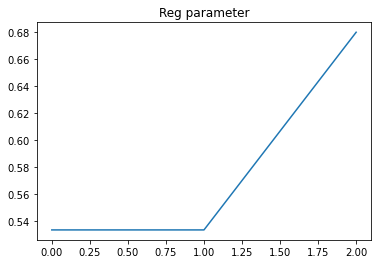

In [3]:
scores=[]
learning_rate=['constant', 'invscaling', 'adaptive']
for lr in learning_rate :
    model = MLPClassifier(learning_rate=lr, solver='sgd')
    model.fit(Xtrain, Ytrain)
    scores.append(model.score(Xtest, Ytest))
plt.plot([i for i in range(3)], scores)
plt.title("Reg parameter")
plt.show()

Як ми бачимо, кращий варіант - адаптивна швидкість навчання
(Швидкість навчання адптується до ефективності навчання моделі)

In [4]:
model = MLPClassifier(random_state=1)
model.fit(Xtrain, Ytrain)
print("Score of default model: ", model.score(Xtest, Ytest))
print("Loss on starting iters: ", model.loss_curve_[:2])
print("Loss on ending iters: ", model.loss_curve_[-2:])
del model
Xws1, Xws2, Yws1, Yws2=train_test_split(Xtrain, Ytrain)
model = MLPClassifier(warm_start=True, random_state=1)
model.fit(Xws1, Yws1)
model.fit(Xws2,Yws2)
print("Score of warm started model: ",  model.score(Xtest, Ytest))
print("Loss on starting iters: ", model.loss_curve_[:2])
print("Loss on ending iters: ", model.loss_curve_[-2:])

Score of default model:  0.7066666666666667
Loss on starting iters:  [0.7101715944882308, 0.7057411128144288]
Loss on ending iters:  [0.6041167786238216, 0.6035184378608294]
Score of warm started model:  0.6933333333333334
Loss on starting iters:  [0.7146579318168396, 0.7121930786606732]
Loss on ending iters:  [0.628514616408963, 0.6496372850127791]


Warm start використовується для донавчання моделі, якщо потім ми отримуємо більше данних і хочимо їх
додати до існуючих. В теорії, точність не повинна змінюватися

### Вибір кращої моделі
В задачах класифiкацiї для кожної навчальної вибiрки вибрати найкращу модель за критерiями якостi:
Зробити висновки про якiсть роботи моделей нейронних мереж на дослi-
джених даних.

In [5]:
from sklearn.model_selection import GridSearchCV
#некоторые парметры пришлось подрезать потому что оно тренируется вечность
def full_grid_search(Xtrain, Ytrain):
    rates=['constant', 'invscaling', 'adaptive']
    solvers=['lbfgs', 'sgd', 'adam']
    max_iter=[200*i for i in range(1,4)]
    param_grid={
                "max_iter":max_iter,
                "solver":solvers,
                "learning_rate":rates
                }
    #матриця неточностей (confusion matrix) - это как. Там же 4 числа. Пусть будет акураси
    searcher = GridSearchCV(estimator=MLPClassifier(),
                            param_grid=param_grid,
                            scoring=["accuracy","precision","recall","f1", "roc_auc"],
                            #scoring="accuracy",
                            cv=3,
                            refit=False,
                            n_jobs=-1)
    searcher.fit(Xtrain,Ytrain)
    return searcher


In [6]:
searcher=full_grid_search(Xtrain, Ytrain)
results = searcher.cv_results_
model_param_a=results["params"][np.argmax(results["mean_test_accuracy"])]
print("Max accuracy :",np.max(results["mean_test_accuracy"]))
model_param_pr=results["params"][np.argmax(results["mean_test_precision"])]
print("Max precision :",np.max(results["mean_test_precision"]))
model_param_rec=results["params"][np.argmax(results["mean_test_recall"])]
print("Max recall :",np.max(results["mean_test_recall"]))
model_param_f1=results["params"][np.argmax(results["mean_test_f1"])]
print("Max f1 :",np.max(results["mean_test_f1"]))
model_param_ra=results["params"][np.argmax(results["mean_test_roc_auc"])]
print("Max roc auc :",np.max(results["mean_test_roc_auc"]))

Max accuracy : 0.9688888888888889
Max precision : 0.9751724137931035
Max recall : 0.9722222222222222
Max f1 : 0.9673969744392279
Max roc auc : 0.9966761633428302


# 5. Побудувати ансамблi моделей, 
використовуючи наступнi методи згiдно з варiантом:

Stacking classifier - це ансамблевий метод, який поєднує декілька різних моделей та використовує їх результати
для навчання мета-класифікатору, який вже формує кінцеве передбачення. В якості параметрів метод приймає:

1)estimators - моделі, які поєднуються

2)final_estimator - мета-класифікатор

3)stack_method - метод, за допомогою якого отримуються передбачення базових моделей

In [7]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

estimators=[
    ("svm", SVC(kernel='rbf', probability=True)),
    ("svm2", SVC(kernel='rbf', probability=True)),
    ("nn", MLPClassifier(max_iter=2000, early_stopping=True)),
    ("nn2", MLPClassifier(max_iter=2000, early_stopping=True)),
    ("nn3", MLPClassifier(max_iter=2000, early_stopping=True))
]
clf=StackingClassifier(
    estimators=estimators,
).fit(Xtrain, Ytrain)
print("Stacking classifier score:", clf.score(Xtest,Ytest))

Stacking classifier score: 0.9466666666666667


4.
 В якостi base_estimator / estimators використати одну/ декiль-
ка найпростiших моделей заданих за варiантом: дерев рiшень, svm,
нейронних мереж тощо. Порiвняти значення мiр F1_score та AUC
або R2 для ансамблiв та окремих моделей, якi утворюють ансамбль
(модель base_estimator / моделi estimators). Порiвняти декiль-
ка ансамблiв, якi утворенi на основi одних estimators i вiдрiзня-
ються значеннями параметрiв.
StackingClassifier. Розглянути рiзнi значення параметрiв final_estimator
та stack_method.

In [8]:
#different stacking classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier,PassiveAggressiveClassifier
from sklearn.metrics import roc_auc_score, f1_score
###########ТУТ FINAL ESTIMATOR######################
final_est=[LogisticRegression(), RidgeClassifier(), PassiveAggressiveClassifier(), SGDClassifier(), SVC(), MLPClassifier()]
final_est_str='LogisticRegression(), RidgeClassifier(), PassiveAggressiveClassifier(), SGDClassifier(), SVC(), MLPClassifier()'.split(', ')
model= SVC(kernel='rbf').fit(Xtrain, Ytrain);
print("Score | Auc|f1 for SVC:",model.score(Xtest,Ytest), roc_auc_score(model.predict(Xtest),Ytest), " , ", f1_score(model.predict(Xtest), Ytest))
model= MLPClassifier().fit(Xtrain, Ytrain);
print("Score | Auc|f1 for NN:", model.score(Xtest,Ytest), roc_auc_score(model.predict(Xtest),Ytest), " , ", f1_score(model.predict(Xtest), Ytest))
ra=[]
f1=[]
ac=[]
for est, string in zip(final_est,final_est_str) :
    clf=StackingClassifier(
    estimators=estimators,
        final_estimator=est
    ).fit(Xtrain, Ytrain)
    print(str(string), "\nScore | Auc|f1:",clf.score(Xtest,Ytest),
          roc_auc_score(Ytest, model.predict(Xtest)), " , ", f1_score(Ytest, model.predict(Xtest)))
    ra.append(roc_auc_score(Ytest, model.predict(Xtest)))
    f1.append(f1_score(Ytest, model.predict(Xtest)))
    ac.append(clf.score(Xtest,Ytest))

Score | Auc|f1 for SVC: 0.9066666666666666 0.9166666666666667  ,  0.8923076923076922
Score | Auc|f1 for NN: 0.68 0.8125  ,  0.4782608695652174
LogisticRegression() 
Score | Auc|f1: 0.9466666666666667 0.6571428571428571  ,  0.4782608695652174
RidgeClassifier() 
Score | Auc|f1: 0.9466666666666667 0.6571428571428571  ,  0.4782608695652174
PassiveAggressiveClassifier() 
Score | Auc|f1: 0.96 0.6571428571428571  ,  0.4782608695652174
SGDClassifier() 
Score | Auc|f1: 0.76 0.6571428571428571  ,  0.4782608695652174
SVC() 
Score | Auc|f1: 0.9466666666666667 0.6571428571428571  ,  0.4782608695652174
MLPClassifier() 
Score | Auc|f1: 0.9466666666666667 0.6571428571428571  ,  0.4782608695652174


In [9]:
#descision function is not implemented in perceptron
stack_method=['predict_proba', 'predict']
for sm in stack_method:
    clf=StackingClassifier(
    estimators=estimators,
        stack_method=sm
    ).fit(Xtrain, Ytrain)
    print(str(sm), "\nScore | Auc|f1:",clf.score(Xtest,Ytest),
          roc_auc_score(model.predict(Xtest),Ytest), " , ",
          f1_score(model.predict(Xtest), Ytest))

predict_proba 
Score | Auc|f1: 0.9466666666666667 0.8125  ,  0.4782608695652174
predict 
Score | Auc|f1: 0.9066666666666666 0.8125  ,  0.4782608695652174


Ансамбль проигрывает обычному свм (по auc и f1). Может просто мало изначальных моделей в ансамбле\данные слишком простые.
Или не повезло.
Стак-метод почти не влияет на результат (хотя точность стала чуть выше)

In [10]:
def draw_contour(model, X):
    h=0.01
    x_min=X[:,0].min()
    x_max=X[:,0].max()
    y_min=X[:,1].min()
    y_max=X[:,1].max()

    xx= np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min,y_max, h))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm)
    #plt.plot(svm_vectors[0])
    Z=model.predict(np.c_[xx[0].ravel(), xx[1].ravel()])
    Z=Z.reshape(xx[0].shape)
    plt.contourf(xx[0], xx[1], Z, cmap=plt.cm.coolwarm, alpha=0.8)

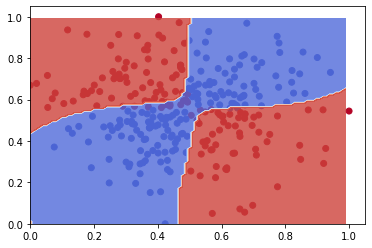

In [11]:
#Support vector machine
draw_contour(SVC(kernel='rbf').fit(Xtrain, Ytrain), X)

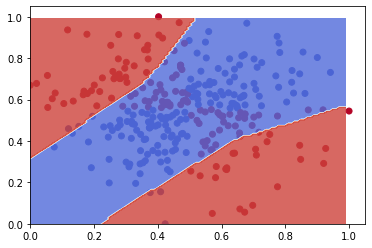

In [12]:
#Simple nn
draw_contour(MLPClassifier().fit(Xtrain, Ytrain), X)

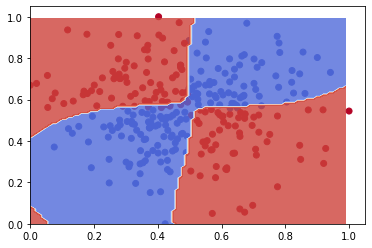

In [13]:
#ensamble
draw_contour(StackingClassifier(
    estimators=estimators,
).fit(Xtrain, Ytrain), X)

Як ми бачимо, модель нейронної мережі на стандартних налаштуваннях недонавчана, і від цього
ансамбль страдає

### GradientBoostingClassifier
Додатково побудувати ансамблi GradientBoostingClassifier. Розглянути
рiзнi значення параметрiв learning_rate, subsample та max_features.
Порiвняти scores для цих ансамблiв з i без ранньої зупинки.


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(Xtrain, Ytrain)
print("Default score : ", clf.score(Xtest, Ytest))

Default score :  1.0


Непогано. Можно спробувати інші параметри, щоб стало гірше

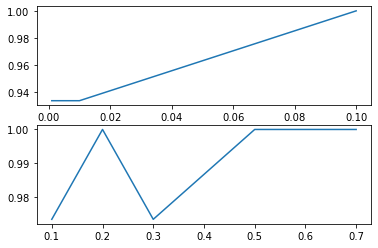

In [15]:
learning_rate=[0.001*10**i for i in range(3)]
subsample=[0.1*i for i in range(1,8)]
#max_features=2 их всего 2! куда меньше
fig, (ax1, ax2)=plt.subplots(2)
scores=[]
for lr in learning_rate:
    scores.append(GradientBoostingClassifier(learning_rate=lr).fit(Xtrain, Ytrain).score(Xtest, Ytest))
ax1.plot(learning_rate, scores)
scores=[]
for sb in subsample:
    scores.append(GradientBoostingClassifier(subsample=sb, n_iter_no_change=10).fit(Xtrain, Ytrain).score(Xtest, Ytest))
ax2.plot(subsample, scores)

Висновок: цю модель складно зломати. Ще ми бачимо, що на малій швидкості навчання вона не встигає наавчитися і треба
збільшувати кількість ітерацій. Ну і з ерлі стопом вона теж працює непогано. Прекрасна модель! Хотілось би,
щоб подібні траплялися в житті частіше

Побудувати графiки залежностi значень помилок класифiкацiї
accuracy_score або zero_one_loss вiд значення n_estimators для
дослiджених ансамблiв та окремих моделей на однiй координатнiй
вiсi.

Text(0.5, 1.0, 'Accuracy score score')

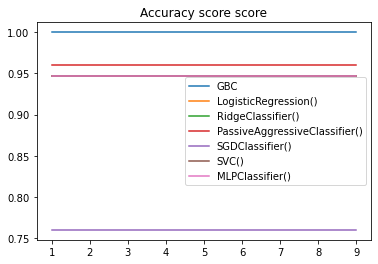

In [16]:
scores=[]
for i in range(1,10):
    scores.append(GradientBoostingClassifier(n_estimators=50*i).fit(Xtrain, Ytrain).score(Xtest, Ytest))
plt.plot([i for i in range(1,10)], scores)
for a in ac:
    plt.plot([i for i in range(1,10)], [a for i in range(1,10)])
plt.legend(["GBC"]+final_est_str)
plt.title("Accuracy score score")

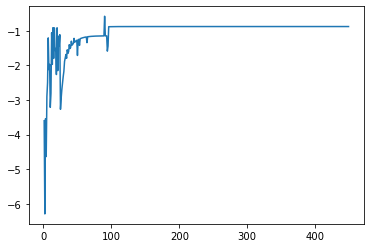

In [17]:
#может быть я чего-то не понимаю, но как можно построить их на 1й прямой для отдельных моделей?
#отдельная модель возвращает всего одно значение
#а отдельные модели внутри GradientBoostingClassifier - регрессоры, а не класификаторы, так что строить их
#на одной прямой такая себе затея
clf=GradientBoostingClassifier(n_estimators=450).fit(Xtrain, Ytrain)
plt.plot([i for i in range(1,450)], [clf.estimators_[i][0].score(Xtest, Ytest) for i in range(1,450)])

В задачах класифiкацiї побудувати графiки залежностi значень мi-
ри F1_score вiд значення n_estimators для дослiджених ансамблiв

та окремих моделей на однiй координатнiй вiсi. Аналогiчнi графi-
ки побудувати для AUC. Графiки для окремих моделей, очевидно,

будуть горизонтальними прямими.

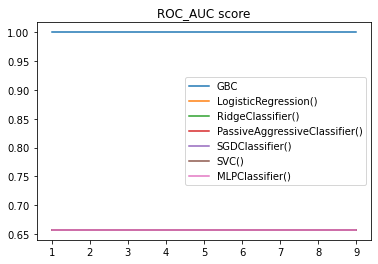

In [18]:
models=[GradientBoostingClassifier(n_estimators=50*i).fit(Xtrain, Ytrain)
        for i in range(1,10)]
plt.plot([i for i in range(1,10)],[roc_auc_score(Ytest, models[i-1].predict(Xtest)) for i in range(1,10)])
#ra - roc auc from different StackingClassifiers
for r in ra:
    plt.plot([i for i in range(1,10)], [r for i in range(1,10)])
plt.legend(["GBC"]+final_est_str)
plt.title("ROC_AUC score")
plt.show()

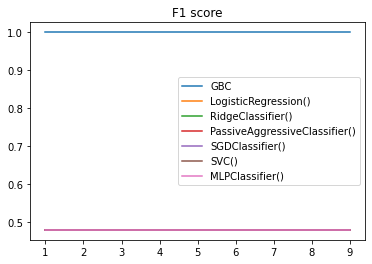

In [19]:
plt.plot([i for i in range(1,10)],[f1_score(Ytest, models[i-1].predict(Xtest)) for i in range(1,10)])
#f1 from different StackingClassifiers
for r in f1:
    plt.plot([i for i in range(1,10)], [r for i in range(1,10)])
plt.legend(["GBC"]+final_est_str)
plt.title("F1 score")
plt.show()

### Краща в світі модель для ХОР

Stack all score: 0.9866666666666667


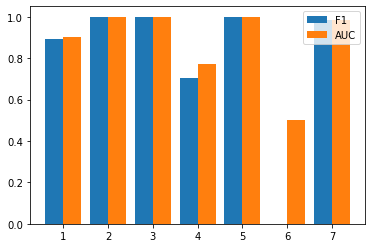

In [20]:
estimators=[
    ("svm", SVC(kernel='rbf')),
    ("nna", MLPClassifier(**model_param_a)),
    ("nnf1", MLPClassifier(**model_param_f1)),
    ("nnpr", MLPClassifier(**model_param_pr)),
    ("nnra", MLPClassifier(**model_param_ra)),
    ("nnrec", MLPClassifier(**model_param_rec))
]
clf=StackingClassifier(
    estimators=estimators,
).fit(Xtrain, Ytrain)
print("Stack all score:", clf.score(Xtest,Ytest))

f1 = np.arange(1, 8) - 0.2
auc = np.arange(1, 8) + 0.2
f1_sc=[]
auc_score=[]
for est in estimators:
    est[1].fit(Xtrain, Ytrain)
    auc_score.append( roc_auc_score(Ytest, est[1].predict(Xtest)))
    f1_sc.append(f1_score(Ytest, est[1].predict(Xtest)))
fig, ax = plt.subplots()
auc_score.append( roc_auc_score(Ytest, clf.predict(Xtest)))
f1_sc.append(f1_score(Ytest, clf.predict(Xtest)))
ax.bar(f1, f1_sc, width = 0.4)
ax.bar(auc, auc_score, width = 0.4)
ax.legend(("F1", "AUC"))
#я не умею подписывать цифры
plt.show()

Как мы видим - все отлично. На графике свм первый, а ансамбль - последний
Хотя 96% в принципе неплохо...
(А еще оно иногда рандомит)

Вывод: в принципе прикольно

# Цифри

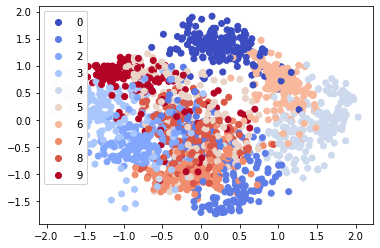

In [21]:
from sklearn.datasets import load_digits
X=load_digits().data
Y=load_digits().target
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y)
from sklearn.decomposition import PCA
X=StandardScaler().fit_transform(X)
min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
X_pca=PCA().fit_transform(X, 2)
fig, ax=plt.subplots()
scatter=ax.scatter(X_pca[:,0], X_pca[:,1], c=Y, cmap=plt.cm.coolwarm)
ax.add_artist(ax.legend(*scatter.legend_elements()))

### 2 Побудувати моделi нейронних мереж,
використовуючи класи MLPClassifier або MLPRegressor, для класифiкацiї або регресiї згiдно з варiантом.

In [22]:
#building NN

model = MLPClassifier()
model.fit(Xtrain, Ytrain)
print("Score of default model: ", model.score(Xtest, Ytest))
print("Loss on starting iters: ", model.loss_curve_[:2])
print("Loss on ending iters: ", model.loss_curve_[-2:])

Score of default model:  0.98
Loss on starting iters:  [7.794981580392461, 4.107773358315865]
Loss on ending iters:  [0.004835626776439902, 0.004773515738280212]


Дослiдити вплив рiзних параметрiв MLPClassifier або MLPRegressor, згi-
дно з варiантом, на результат класифiкацiї/ регресiї:
• дослiдити вплив рiзних методiв визначення learning_rate на ре-
зультат класифiкацiї (для solver=’sgd’),
• використати warm_start=True.

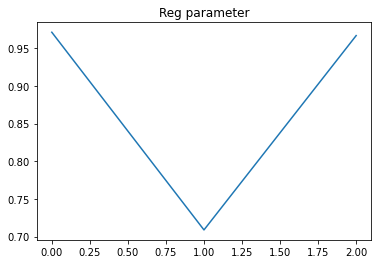

In [23]:
learning_rate=['constant', 'invscaling', 'adaptive']
scores=[]
for lr in learning_rate :
    model = MLPClassifier(learning_rate=lr, solver='sgd')
    model.fit(Xtrain, Ytrain)
    scores.append(model.score(Xtest, Ytest))
plt.plot([i for i in range(3)], scores)
plt.title("Reg parameter")
plt.show()

як бачимо константа та адаптивний впорилася краще за все

In [24]:
model = MLPClassifier(random_state=1)
model.fit(Xtrain, Ytrain)
print("Score of default model: ", model.score(Xtest, Ytest))
print("Loss on starting iters: ", model.loss_curve_[:2])
print("Loss on ending iters: ", model.loss_curve_[-2:])
del model
Xws1, Xws2, Yws1, Yws2=train_test_split(Xtrain, Ytrain)
model = MLPClassifier(warm_start=True, random_state=1)
model.fit(Xws1, Yws1)
model.fit(Xws2,Yws2)
print("Score of warm started model: ",  model.score(Xtest, Ytest))
print("Loss on starting iters: ", model.loss_curve_[:2])
print("Loss on ending iters: ", model.loss_curve_[-2:])

Score of default model:  0.9711111111111111
Loss on starting iters:  [7.208655873928416, 3.964766546334702]
Loss on ending iters:  [0.00440978318241201, 0.004347841901423819]
Score of warm started model:  0.9711111111111111
Loss on starting iters:  [7.921685613918527, 4.416551562122413]
Loss on ending iters:  [0.003663233719716093, 0.1731196605643261]


warm_start працює. Різницю можно пояснити недонавчанням

### Вибір кращої моделі
В задачах класифiкацiї для кожної навчальної вибiрки вибрати найкращу модель за критерiями якостi:
Зробити висновки про якiсть роботи моделей нейронних мереж на дослi-
джених даних.

In [25]:
#небинарные таргеты не поддерживают стандартные ф1 и тд
def nb_grid_search(Xtrain, Ytrain):
    rates=['constant', 'invscaling', 'adaptive']
    solvers=['lbfgs', 'sgd', 'adam']
    max_iter=[200*i for i in range(1,4)]
    param_grid={
                "max_iter":max_iter,
                "solver":solvers,
                "learning_rate":rates
                }

    #матриця неточностей (confusion matrix) - это как. Там же 4 числа. Пусть будет акураси
    searcher = GridSearchCV(estimator=MLPClassifier(),
                            param_grid=param_grid,
                            scoring=["accuracy","precision_weighted","recall_weighted",
                                     "roc_auc_ovr_weighted", "f1_weighted"],
                            refit=False,
                            n_jobs=-1)
    searcher.fit(Xtrain,Ytrain)
    return searcher

In [26]:
searcher=nb_grid_search(Xtrain, Ytrain)
results = searcher.cv_results_
model_param_a=results["params"][np.argmax(results["mean_test_accuracy"])]
print("Max accuracy :",np.max(results["mean_test_accuracy"]))
model_param_pr=results["params"][np.argmax(results["mean_test_precision_weighted"])]
print("Max precision :",np.max(results["mean_test_precision_weighted"]))
model_param_rec=results["params"][np.argmax(results["mean_test_recall_weighted"])]
print("Max recall :",np.max(results["mean_test_recall_weighted"]))
model_param_f1=results["params"][np.argmax(results["mean_test_f1_weighted"])]
print("Max f1 :",np.max(results["mean_test_f1_weighted"]))
model_param_ra=results["params"][np.argmax(results["mean_test_roc_auc_ovr_weighted"])]
print("Max roc auc :",np.max(results["mean_test_roc_auc_ovr_weighted"]))

Max accuracy : 0.9755059892606361
Max precision : 0.9764652183992821
Max recall : 0.9755059892606361
Max f1 : 0.9754042355816722
Max roc auc : 0.9994714768886436


# 5. Побудувати ансамблi моделей,
використовуючи наступнi методи згi-
дно з варiантом:

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
estimators=[
    ("svm", SVC(kernel='rbf', probability=True)),
    ("svm2", SVC(kernel='rbf', probability=True)),
    ("nn", MLPClassifier(max_iter=2000, early_stopping=True)),
    ("nn2", MLPClassifier(max_iter=2000, early_stopping=True)),
    ("nn3", MLPClassifier(max_iter=2000, early_stopping=True))
]
clf=StackingClassifier(
    estimators=estimators,
).fit(Xtrain, Ytrain)
print("Stacking classifier score:", clf.score(Xtest,Ytest))

Stacking classifier score: 0.9888888888888889


Неплохо для моделей без параметров

4.
 В якостi base_estimator / estimators використати одну/ декiль-
ка найпростiших моделей заданих за варiантом: дерев рiшень, svm,
нейронних мереж тощо. Порiвняти значення мiр F1_score та AUC
або R2 для ансамблiв та окремих моделей, якi утворюють ансамбль
(модель base_estimator / моделi estimators). Порiвняти декiль-
ка ансамблiв, якi утворенi на основi одних estimators i вiдрiзня-
ються значеннями параметрiв.
StackingClassifier. Розглянути рiзнi значення параметрiв final_estimator
та stack_method.
Stack_method-ы не реализованы в части классификаторов. Да перебор этих методов бесполезен - в автоматическом режиме оно и так останавливается на самом лучшем

К сожалению по каким-то не очень понятным причинам рок аук нельзя посчитать руками - оно все время кидает ексепшн
(установка параметров для мультиклассов тоже не дают результатов)

In [28]:
final_est=[LogisticRegression(), RidgeClassifier(), PassiveAggressiveClassifier(), SGDClassifier(), SVC(), MLPClassifier()]
final_est_str='LogisticRegression(), RidgeClassifier(), PassiveAggressiveClassifier(), SGDClassifier(), SVC(), MLPClassifier()'.split(', ')
model= SVC(kernel='rbf').fit(Xtrain, Ytrain);
print("Score | Auc|f1 for SVC:",model.score(Xtest,Ytest),
      " , ", f1_score(model.predict(Xtest), Ytest, average='weighted'))
model= MLPClassifier().fit(Xtrain, Ytrain);
print("Score | Auc|f1 for NN:", model.score(Xtest,Ytest),
      " , ", f1_score(model.predict(Xtest), Ytest,average='weighted'))
f1=[]
ac=[]
for est, string in zip(final_est,final_est_str) :
    clf=StackingClassifier(
    estimators=estimators,
        final_estimator=est
    ).fit(Xtrain, Ytrain)
    Ypred=clf.predict(Xtest)
    print(str(string), "\nScore | Auc|f1:",clf.score(Xtest,Ytest),
          f1_score(Ytest,Ypred,average='weighted'))
    f1.append(f1_score(Ytest, Ypred, average='weighted'))
    ac.append(clf.score(Xtest,Ytest))

Score | Auc|f1 for SVC: 0.9888888888888889  ,  0.9888747949508848
Score | Auc|f1 for NN: 0.9733333333333334  ,  0.9733892756856526
LogisticRegression() 
Score | Auc|f1: 0.9911111111111112 0.9911479477385245
RidgeClassifier() 
Score | Auc|f1: 0.9888888888888889 0.9889528271081413
PassiveAggressiveClassifier() 
Score | Auc|f1: 0.9911111111111112 0.9911479477385245
SGDClassifier() 
Score | Auc|f1: 0.9866666666666667 0.9867507180783417
SVC() 
Score | Auc|f1: 0.9911111111111112 0.9911479477385245
MLPClassifier() 
Score | Auc|f1: 0.9911111111111112 0.9911479477385245


In [29]:
stack_method=['predict_proba', 'predict']
for sm in stack_method:
    clf=StackingClassifier(
    estimators=estimators,
        stack_method=sm
    ).fit(Xtrain, Ytrain)
    print(str(sm), "\nScore | Auc|f1:",clf.score(Xtest,Ytest),
          " , ", f1_score(model.predict(Xtest), Ytest, average='weighted'))

predict_proba 
Score | Auc|f1: 0.9888888888888889  ,  0.9733892756856526
predict 
Score | Auc|f1: 0.8755555555555555  ,  0.9733892756856526


Ансамбль находится на уровне обычного свм (Хотя там и очень хороший уровень).

Додатково побудувати ансамблi GradientBoostingClassifier. Розглянути
рiзнi значення параметрiв learning_rate, subsample та max_features.
Порiвняти scores для цих ансамблiв з i без ранньої зупинки.


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(Xtrain, Ytrain)
print("Default score : ", clf.score(Xtest, Ytest))


Default score :  0.9555555555555556


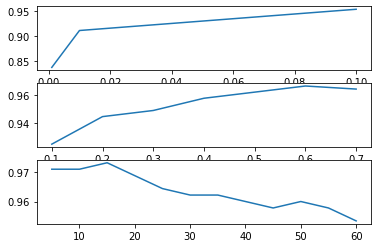

In [31]:
learning_rate=[0.001*10**i for i in range(3)]
subsample=[0.1*i for i in range(1,8)]
max_features=[i for i in range(5,65,5)]
fig, (ax1, ax2, ax3)=plt.subplots(3)
scores=[]
for lr in learning_rate:
    scores.append(GradientBoostingClassifier(learning_rate=lr).fit(Xtrain, Ytrain).score(Xtest, Ytest))
ax1.plot(learning_rate, scores)
scores=[]
for sb in subsample:
    scores.append(GradientBoostingClassifier(subsample=sb, n_iter_no_change=10).fit(Xtrain, Ytrain).score(Xtest, Ytest))
ax2.plot(subsample, scores)
scores=[]
for mf in max_features:
    scores.append(GradientBoostingClassifier(max_features=mf).fit(Xtrain, Ytrain).score(Xtest, Ytest))
ax3.plot(max_features, scores)

Висновок: цю модель складно зломати. Ще ми бачимо, що на малій швидкості навчання вона не встигає навчитися
і треба збільшувати кількість ітерацій. Ну і з ерлі стопом вона теж працює непогано.
Зі зміною кількості фіч якість майже не змінюється - гарний знак щодо можливості спрощення моделі та зменьшенню часу її
тренування на великих датасетах

Побудувати графiки залежностi значень помилок класифiкацiї
accuracy_score або zero_one_loss вiд значення n_estimators для
дослiджених ансамблiв та окремих моделей на однiй координатнiй
вiсi.

• В задачах класифiкацiї побудувати графiки залежностi значень мi-
ри F1_score вiд значення n_estimators для дослiджених ансамблiв

та окремих моделей на однiй координатнiй вiсi. Аналогiчнi графi-
ки побудувати для AUC. Графiки для окремих моделей, очевидно,

будуть горизонтальними прямими.

Text(0.5, 1.0, 'Accuracy score')

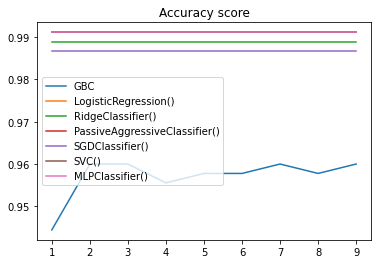

In [32]:
scores=[]
for i in range(1,10):
    scores.append(GradientBoostingClassifier(n_estimators=50*i).fit(Xtrain, Ytrain).score(Xtest, Ytest))
plt.plot([i for i in range(1,10)], scores)
for a in ac:
    plt.plot([i for i in range(1,10)], [a for i in range(1,10)])
plt.legend(["GBC"]+final_est_str)
plt.title("Accuracy score")

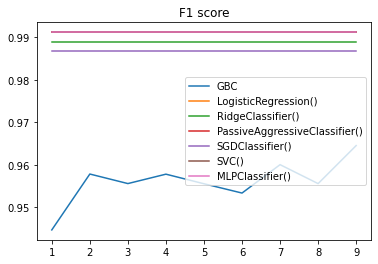

In [33]:
models=[GradientBoostingClassifier(n_estimators=50*i).fit(Xtrain, Ytrain)
        for i in range(1,10)]
plt.plot([i for i in range(1,10)],[f1_score(Ytest, models[i-1].predict(Xtest), average='weighted')
                                   for i in range(1,10)])
for r in f1:
    plt.plot([i for i in range(1,10)], [r for i in range(1,10)])
plt.legend(["GBC"]+final_est_str)
plt.title("F1 score")
plt.show()

GradientBoostingClassifier демонструє трохи гірші за ансамблі результати

### StackingClassifier

Stack all score: 0.9844444444444445


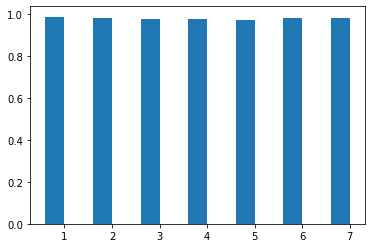

In [34]:
estimators=[
    ("svm", SVC(kernel='rbf')),
    ("nna", MLPClassifier(**model_param_a)),
    ("nnf1", MLPClassifier(**model_param_f1)),
    ("nnpr", MLPClassifier(**model_param_pr)),
    ("nnra", MLPClassifier(**model_param_ra)),
    ("nnrec", MLPClassifier(**model_param_rec))
]
clf=StackingClassifier(
    estimators=estimators,
).fit(Xtrain, Ytrain)
print("Stack all score:", clf.score(Xtest,Ytest))

f1 = np.arange(1, 8) - 0.2
auc = np.arange(1, 8) + 0.2
f1_sc=[]
auc_score=[]

for est in estimators:
    est[1].fit(Xtrain, Ytrain)
    #roc_auc_score не работает(9((((
    #auc_score.append( roc_auc_score(Ytest, est[1].predict(Xtest), multi_class='ovo'))
    f1_sc.append(f1_score(Ytest, est[1].predict(Xtest), average='weighted'))
fig, ax = plt.subplots()
#auc_score.append( roc_auc_score(Ytest, clf.predict(Xtest)))
f1_sc.append(f1_score(Ytest, clf.predict(Xtest), average='weighted'))
ax.bar(f1, f1_sc, width = 0.4)
#ax.bar(auc, auc_score, width = 0.4)

plt.show()

Все модели крутые и показывают примерно одинаковый результат! (По крайней мере ф1 скор).
В принципе там и самые простые линейные модели показывали высокую точность, но все равно прикольно